Імпортуємо пакет pandas

In [44]:
import pandas as pd
import seaborn as sns

Завантажую файли movies.dat, ratings.dat, users.dat у змінні за допомогою пакету pandas

In [24]:
encoding = 'ISO-8859-1'

movies_df = pd.read_csv('movies.dat', sep='::', names=['MovieID', 'Title', 'Genres'], encoding=encoding, engine='python')
ratings_df = pd.read_csv('ratings.dat', sep='::', names=['UserID', 'MovieID', 'Rating', 'Timestamp'], encoding=encoding, engine='python')
users_df = pd.read_csv('users.dat', sep='::', names=['UserID', 'Gender', 'Age', 'Occupation', 'ZIP_code'], encoding=encoding, engine='python')

Робимо Merge в єдиний DataFrame

In [25]:
merged_df = pd.merge(movies_df, ratings_df, on='MovieID')
merged_df = pd.merge(merged_df, users_df, on='UserID')

Визначимо функцію get_top яка повертає повний список фільмів відповідної статі та віку

In [26]:
def get_top(_lst, _gender, _age, _movies_df):
    top_movies = _lst[(_lst['Age'] == _age) & (_lst['Gender'] == _gender)]
    top_movies = top_movies.groupby('MovieID')['Rating'].mean()
    top_movies = pd.merge(_movies_df, top_movies, on='MovieID')
    top_movies = top_movies.sort_values(by=['Rating'], ascending=[False])
    return top_movies

Визначемо функцію яка буде виводити фільми для відповідної статі та віку

In [27]:
def print_top_ten(_lst, _gender, _age, _movies_df):
    top_movies = get_top(_lst, _gender, _age, _movies_df).head(10)
    print(top_movies.to_string())

Виводимо топ 10 фільмів жінок до 18 років

In [28]:
print_top_ten(merged_df, 'F', 1, movies_df)

      MovieID                                            Title             Genres  Rating
1297     2461  Leatherface: Texas Chainsaw Massacre III (1990)             Horror     5.0
1977     3839                     Phantasm IV: Oblivion (1998)             Horror     5.0
686      1330                          April Fool's Day (1986)      Comedy|Horror     5.0
677      1299                       Killing Fields, The (1984)          Drama|War     5.0
1929     3741                                  Badlands (1973)        Crime|Drama     5.0
676      1298                     Pink Floyd - The Wall (1982)  Drama|Musical|War     5.0
669      1289                             Koyaanisqatsi (1983)    Documentary|War     5.0
666      1286                         Somewhere in Time (1980)      Drama|Romance     5.0
664      1284                            Big Sleep, The (1946)  Film-Noir|Mystery     5.0
659      1279                            Night on Earth (1991)       Comedy|Drama     5.0


In [29]:
print_top_ten(merged_df, 'M', 1, movies_df)

      MovieID                                 Title                  Genres  Rating
533       948                          Giant (1956)                   Drama     5.0
953      1633                    Ulee's Gold (1997)                   Drama     5.0
1053     1827                   Big One, The (1997)      Comedy|Documentary     5.0
1046     1810                 Primary Colors (1998)                   Drama     5.0
1038     1794  Love and Death on Long Island (1997)            Comedy|Drama     5.0
1028     1770                      B. Monkey (1998)        Romance|Thriller     5.0
1849     3088                         Harvey (1950)                  Comedy     5.0
407       680                     Alphaville (1965)                  Sci-Fi     5.0
396       640                     Diabolique (1996)          Drama|Thriller     5.0
986      1683         Wings of the Dove, The (1997)  Drama|Romance|Thriller     5.0


In [30]:
print_top_ten(merged_df, 'F', 18, movies_df)

      MovieID                                                              Title          Genres  Rating
1671     2215                                            Rich and Strange (1932)  Comedy|Romance     5.0
2400     3201                                            Five Easy Pieces (1970)           Drama     5.0
2271     3011                              They Shoot Horses, Don't They? (1969)           Drama     5.0
864      1178                                              Paths of Glory (1957)       Drama|War     5.0
2274     3017                                                 Creepshow 2 (1987)          Horror     5.0
2278     3021                                               Funhouse, The (1981)          Horror     5.0
2279     3022                                                General, The (1927)          Comedy     5.0
166       199  Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964)   Drama|Musical     5.0
2298     3048                                          

In [31]:
print_top_ten(merged_df, 'M', 18, movies_df)

      MovieID                                        Title          Genres  Rating
2737     3284                  They Might Be Giants (1971)  Comedy|Romance     5.0
391       439                        Dangerous Game (1993)           Drama     5.0
563       633                       Denise Calls Up (1995)          Comedy     5.0
2452     2931  Time of the Gypsies (Dom za vesanje) (1989)           Drama     5.0
2457     2937                 Palm Beach Story, The (1942)          Comedy     5.0
542       602                Great Day in Harlem, A (1994)     Documentary     5.0
46         49                 When Night Is Falling (1995)   Drama|Romance     5.0
2537     3038                  Face in the Crowd, A (1957)           Drama     5.0
2569     3077                                 42 Up (1998)     Documentary     5.0
2980     3586                        Idolmaker, The (1980)           Drama     5.0


In [32]:
print_top_ten(merged_df, 'F', 25, movies_df)

      MovieID                                       Title           Genres  Rating
264       297                              Panther (1995)            Drama     5.0
1865     2309  Inheritors, The (Die Siebtelbauern) (1998)            Drama     5.0
864      1071                       For the Moment (1994)      Romance|War     5.0
580       669                            Aparajito (1956)            Drama     5.0
581       670      World of Apu, The (Apur Sansar) (1959)            Drama     5.0
2826     3470                          Dersu Uzala (1974)  Adventure|Drama     5.0
653       787          Gate of Heavenly Peace, The (1995)      Documentary     5.0
672       824                        Kaspar Hauser (1993)            Drama     5.0
1485     1879                  Hanging Garden, The (1997)            Drama     5.0
1417     1780            Ayn Rand: A Sense of Life (1997)      Documentary     5.0


In [33]:
print_top_ten(merged_df, 'M', 25, movies_df)

      MovieID                                Title          Genres  Rating
2784     3172              Ulysses (Ulisse) (1954)       Adventure     5.0
2591     2962                   Fever Pitch (1997)  Comedy|Romance     5.0
2027     2358                        Savior (1998)           Drama     5.0
2829     3232                 Seven Chances (1925)          Comedy     5.0
2974     3410                    Soft Fruit (1999)    Comedy|Drama     5.0
695       787   Gate of Heavenly Peace, The (1995)     Documentary     5.0
2562     2930             Return with Honor (1998)     Documentary     5.0
1518     1795  Callejón de los milagros, El (1995)           Drama     5.0
846       974                       Algiers (1938)   Drama|Romance     5.0
3179     3640           King in New York, A (1957)    Comedy|Drama     5.0


In [34]:
print_top_ten(merged_df, 'F', 35, movies_df)

      MovieID                                Title                   Genres  Rating
288       341              Double Happiness (1994)                    Drama     5.0
1766     2332                         Belly (1998)              Crime|Drama     5.0
1674     2197                     Firelight (1997)                    Drama     5.0
1256     1662                  Gang Related (1997)                    Crime     5.0
2256     2911  Grandfather, The (El Abuelo) (1998)                    Drama     5.0
226       268                 Little Odessa (1994)                    Drama     5.0
1718     2275            Six-String Samurai (1998)  Action|Adventure|Sci-Fi     5.0
758       996             Last Man Standing (1996)     Action|Drama|Western     5.0
2251     2904                          Rain (1932)                    Drama     5.0
1955     2538                    Dancemaker (1998)              Documentary     5.0


In [35]:
print_top_ten(merged_df, 'M', 35, movies_df)

      MovieID                                                                 Title         Genres  Rating
2975     3492                                          Son of the Sheik, The (1926)      Adventure     5.0
3320     3883                                    Catfish in Black Bean Sauce (2000)   Comedy|Drama     5.0
1418     1725                                  Education of Little Tree, The (1997)          Drama     5.0
1362     1652                                              Year of the Horse (1997)    Documentary     5.0
49         53                                                       Lamerica (1994)          Drama     5.0
569       638                                                 Jack and Sarah (1995)        Romance     5.0
542       598                                                Window to Paris (1994)         Comedy     5.0
1829     2197                                                      Firelight (1997)          Drama     5.0
2158     2569                        

In [36]:
print_top_ten(merged_df, 'F', 45, movies_df)

      MovieID                                Title                                  Genres  Rating
1087     1640            How to Be a Player (1997)                                  Comedy     5.0
2596     3739           Trouble in Paradise (1932)                          Comedy|Romance     5.0
237       326              To Live (Huozhe) (1994)                                   Drama     5.0
2229     3217               Star Is Born, A (1937)                                   Drama     5.0
1217     1881             Quest for Camelot (1998)  Adventure|Animation|Children's|Fantasy     5.0
1383     2077    Journey of Natty Gann, The (1985)                    Adventure|Children's     5.0
2170     3127                    Holy Smoke (1999)                                   Drama     5.0
514       766            I Shot Andy Warhol (1996)                                   Drama     5.0
292       390  Faster Pussycat! Kill! Kill! (1965)                     Action|Comedy|Drama     5.0
1128     1

In [37]:
print_top_ten(merged_df, 'M', 45, movies_df)

      MovieID                                                   Title       Genres  Rating
179       214                   Before the Rain (Pred dozhdot) (1994)        Drama     5.0
2449     3047        Experience Preferred... But Not Essential (1982)        Drama     5.0
2609     3245                     I Am Cuba (Soy Cuba/Ya Kuba) (1964)        Drama     5.0
1842     2342                                   Hard Core Logo (1996)       Comedy     5.0
1831     2330                             Hands on a Hard Body (1996)  Documentary     5.0
1197     1519                                   Broken English (1996)        Drama     5.0
490       573  Ciao, Professore! (Io speriamo che me la cavo ) (1993)        Drama     5.0
287       341                                 Double Happiness (1994)        Drama     5.0
1124     1421                                    Grateful Dead (1995)  Documentary     5.0
2683     3338                                  For All Mankind (1989)  Documentary     5.0

In [38]:
print_top_ten(merged_df, 'F', 50, movies_df)

      MovieID                    Title                 Genres  Rating
479       746     Force of Evil (1948)              Film-Noir     5.0
951      1461    Vegas Vacation (1997)                 Comedy     5.0
1571     2476  Heartbreak Ridge (1986)             Action|War     5.0
125       187        Party Girl (1995)                 Comedy     5.0
1575     2488       Peeping Tom (1960)  Drama|Horror|Thriller     5.0
653      1034           Freeway (1996)                  Crime     5.0
2216     3484       Skulls, The (2000)               Thriller     5.0
285       416         Bad Girls (1994)                Western     5.0
1579     2493   Harmonists, The (1997)                  Drama     5.0
1587     2503  Apple, The (Sib) (1998)                  Drama     5.0


In [39]:
print_top_ten(merged_df, 'M', 50, movies_df)

      MovieID                                                  Title                     Genres  Rating
2560     3192                          Terrorist, The (Malli) (1998)                      Drama     5.0
177       214                  Before the Rain (Pred dozhdot) (1994)                      Drama     5.0
1177     1493                     Love and Other Catastrophes (1996)                    Romance     5.0
1166     1475                      Kama Sutra: A Tale of Love (1996)                    Romance     5.0
610       771               Vie est belle, La (Life is Rosey) (1987)               Comedy|Drama     5.0
2474     3092                                     Chushingura (1962)                      Drama     5.0
659       854      Ballad of Narayama, The (Narayama Bushiko) (1958)                      Drama     5.0
2590     3233                                   Smashing Time (1967)                     Comedy     5.0
2592     3236                                       Zachariah (1

In [40]:
print_top_ten(merged_df, 'F', 56, movies_df)

      MovieID                                                     Title                 Genres  Rating
1052     2253                                               Toys (1992)  Action|Comedy|Fantasy     5.0
1114     2388                    Steam: The Turkish Bath (Hamam) (1997)          Drama|Romance     5.0
1240     2660                      Thing From Another World, The (1951)                 Sci-Fi     5.0
1232     2630                              Besieged (L' Assedio) (1998)                  Drama     5.0
1229     2624                                         After Life (1998)                  Drama     5.0
1224     2615                                 My Science Project (1985)       Adventure|Sci-Fi     5.0
1213     2580                                                 Go (1999)                  Crime     5.0
1212     2575  Dreamlife of Angels, The (La Vie rêvée des anges) (1998)                  Drama     5.0
1200     2550                                      Haunting, The (1963)  

In [41]:
print_top_ten(merged_df, 'M', 56, movies_df)

      MovieID                                       Title                   Genres  Rating
1029     1471                          Boys Life 2 (1997)                    Drama     5.0
2555     3616                                Loser (2000)           Comedy|Romance     5.0
147       214       Before the Rain (Pred dozhdot) (1994)                    Drama     5.0
2625     3709                         Sleepwalkers (1992)                   Horror     5.0
1240     1858                         Mr. Nice Guy (1997)            Action|Comedy     5.0
2173     3092                          Chushingura (1962)                    Drama     5.0
1937     2774                Better Than Chocolate (1999)           Comedy|Romance     5.0
1221     1812                           Wide Awake (1998)  Children's|Comedy|Drama     5.0
126       189                             Reckless (1995)                   Comedy     5.0
2497     3532  Freedom for Us (À nous la liberté ) (1931)                   Comedy     5.0

show_top_ten

In [48]:
def show_top_ten(_lst, _gender, _age, _movies_df):
    top_movies = get_top(_lst, _gender, _age, _movies_df).head(10)
    sns.barplot(data=top_movies, x="MovieID", y="Rating")

C:\Users\Shevchenko\.conda\envs\Labs\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Shevchenko\.conda\envs\Labs\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Shevchenko\.conda\envs\Labs\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


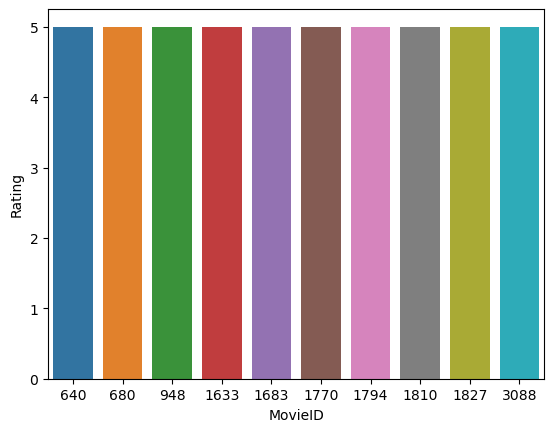

In [49]:
show_top_ten(merged_df, 'M', 1, movies_df)